In [1]:
import pandas as pd
data = pd.read_csv("amazon-purchases.csv")

#type(data["Order Date"][0]) #Date Column is a string
#Create a list with prime days inside it
prime_days = ["2022-07-12", "2022-07-13", "2021-06-21", "2021-06-22", "2020-10-13", "2020-10-14", "2019-07-15", "2019-07-16", "2018-07-17", "2018-07-18",]

prime_purchase = []
for i in data["Order Date"]:
    if i in prime_days:
        prime_purchase.append(1)
    else:
        prime_purchase.append(0)
data["Prime Purchase"] = prime_purchase

data["Prime Purchase"].value_counts()

Prime Purchase
0    1823191
1      27526
Name: count, dtype: int64

In [2]:
# Assuming the survey data is loaded into a DataFrame named survey_data
survey_data = pd.read_csv("survey.csv")

# Merge the dataframes on 'Survey ResponseID'
merged_data = pd.merge(data, survey_data, on='Survey ResponseID', how='inner')

# Display the first few rows of the merged dataframe
print(merged_data.shape, data.shape, survey_data.shape)

(1850717, 31) (1850717, 9) (5027, 23)


In [3]:
merged_data=merged_data.drop(columns=['Q-sell-YOUR-data', 'Q-sell-consumer-data', 'Q-small-biz-use',
       'Q-census-use', 'Q-research-society', 'Q-life-changes'])

In [4]:
merged_data.columns

Index(['Order Date', 'Purchase Price Per Unit', 'Quantity',
       'Shipping Address State', 'Title', 'ASIN/ISBN (Product Code)',
       'Category', 'Survey ResponseID', 'Prime Purchase', 'Q-demos-age',
       'Q-demos-hispanic', 'Q-demos-race', 'Q-demos-education',
       'Q-demos-income', 'Q-demos-gender', 'Q-sexual-orientation',
       'Q-demos-state', 'Q-amazon-use-howmany', 'Q-amazon-use-hh-size',
       'Q-amazon-use-how-oft', 'Q-substance-use-cigarettes',
       'Q-substance-use-marijuana', 'Q-substance-use-alcohol',
       'Q-personal-diabetes', 'Q-personal-wheelchair'],
      dtype='object')

In [11]:
#Subset prime purchases
prime_purchases = merged_data[merged_data["Prime Purchase"] == 1]
#Group by survey response id and count the number of prime purchases and sum the price per unit
prime_purchases = prime_purchases.groupby("Survey ResponseID").agg({"Prime Purchase":"sum", "Purchase Price Per Unit":"sum"})
#Left join prime purchases with survey data
prime_users = pd.merge(prime_purchases, survey_data, on="Survey ResponseID", how="left")
print(prime_users.shape)

(3162, 25)


In [17]:
import plotly.express as px
# Rename the column
prime_users.rename(columns={'Purchase Price Per Unit': 'Purchase Totals'}, inplace=True)

# Plot the data
fig = px.scatter(prime_users, x='Prime Purchase', y='Purchase Totals', title='Prime Purchase Totals by Age')
fig.show()

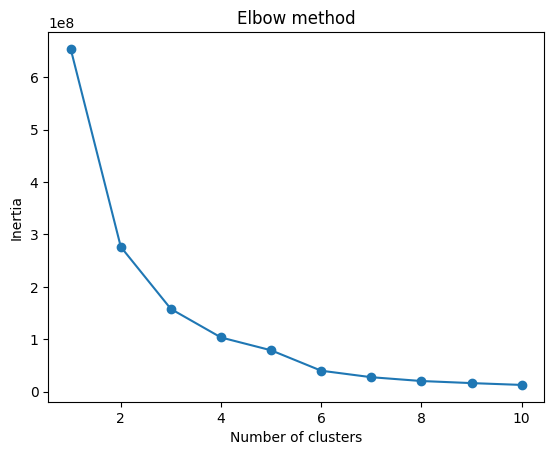

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_data = list(zip(prime_users['Prime Purchase'], prime_users['Purchase Totals']))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

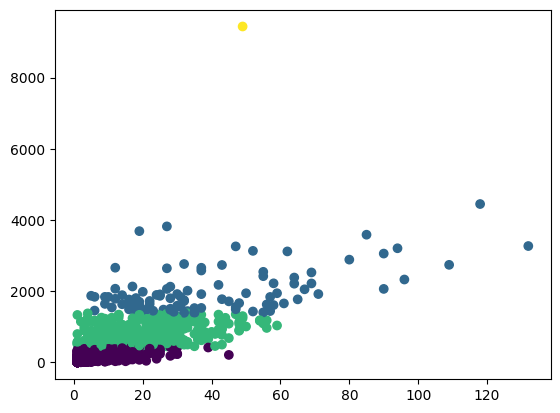

In [42]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(k_data)

plt.scatter(prime_users['Prime Purchase'], prime_users['Purchase Totals'], c=kmeans.labels_)
plt.show()

In [24]:
# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Display the labels assigned to each data point
print("Cluster Labels:")
print(kmeans.labels_)

prime_users['cluster'] = kmeans.labels_

Cluster Centers:
[[  14.80763583  560.23597651]
 [  60.65217391 3286.92086957]
 [   4.7956942   110.39822056]
 [  28.1978022  1393.55478022]]
Cluster Labels:
[0 2 2 ... 2 0 2]


In [25]:
prime_users.head()

,Survey ResponseID,Prime Purchase,Purchase Totals,Q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,...,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,cluster
0,R_037XK72IZBJyF69,24,379.22,55 - 64 years,No,White or Caucasian,Bachelor's degree,"$25,000 - $49,999",Female,heterosexual (straight),...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,I don't know,No,Yes,0
1,R_038ZU6kfQ5f89fH,1,199.99,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,heterosexual (straight),...,No,No,No,Lost a job,Yes,Yes,No,No,Yes,2
2,R_06RZP9pS7kONINr,3,63.93,65 and older,No,White or Caucasian,Bachelor's degree,"$75,000 - $99,999",Female,heterosexual (straight),...,No,Yes,No,Moved place of residence,No,No,Yes,No,No,2
3,R_06d9ULxrBmkwSTn,2,20.35,45 - 54 years,No,Black or African American,Bachelor's degree,"$100,000 - $149,999",Male,heterosexual (straight),...,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,Yes,Yes,2
4,R_07oHvj3bLVVRCRb,1,7.99,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,LGBTQ+,...,Yes,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,I don't know,Yes,2
